In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load in training data on each potential synapse
data = pd.read_csv("./train_data.csv")

#load in additional features for each neuron
feature_weights = pd.read_csv("./feature_weights.csv")
morph_embeddings = pd.read_csv("./morph_embeddings.csv")

In [2]:
# join all feature_weight_i columns into a single np.array column
feature_weights["feature_weights"] = (
    feature_weights.filter(regex="feature_weight_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the feature_weight_i columns
feature_weights.drop(
    feature_weights.filter(regex="feature_weight_").columns, axis=1, inplace=True
)

# join all morph_embed_i columns into a single np.array column
morph_embeddings["morph_embeddings"] = (
    morph_embeddings.filter(regex="morph_emb_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the morph_embed_i columns
morph_embeddings.drop(
    morph_embeddings.filter(regex="morph_emb_").columns, axis=1, inplace=True
)

In [3]:
data = (
    data.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [4]:
#cosine similarity function
def row_feature_similarity(row):
    pre = row["pre_feature_weights"]
    post = row["post_feature_weights"]
    return (pre * post).sum() / (np.linalg.norm(pre) * np.linalg.norm(post))

In [5]:
# compute the cosine similarity between the pre- and post- feature weights
data["fw_similarity"] = data.apply(row_feature_similarity, axis=1)

In [6]:
# generate projection group as pre->post
data["projection_group"] = (
    data["pre_brain_area"].astype(str)
    + "->"
    + data["post_brain_area"].astype(str)
)

In [7]:
data['fw_post_interaction'] = data['fw_similarity'] * data['post_test_score']
data['fw_pre_interaction'] = data['fw_similarity'] * data['pre_test_score']

In [8]:
# now do the same for leaderboard data
lb_data = pd.read_csv("./leaderboard_data.csv")
# fw sim engineering
lb_data = (
    lb_data.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)
lb_data["fw_similarity"] = lb_data.apply(row_feature_similarity, axis=1)

# proj OHE engineering
lb_data["projection_group"] = (
    lb_data["pre_brain_area"].astype(str)
    + "->"
    + lb_data["post_brain_area"].astype(str)
)

lb_data['fw_post_interaction'] = lb_data['fw_similarity'] * lb_data['post_test_score']
lb_data['fw_pre_interaction'] = lb_data['fw_similarity'] * lb_data['pre_test_score']

lb_data.head()


,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,pre_nucleus_id,post_nucleus_id,pre_feature_weights,post_feature_weights,pre_morph_embeddings,post_morph_embeddings,fw_similarity,projection_group,fw_post_interaction,fw_pre_interaction
0,0,527499,544761,912282,529457,543459,916958,4783.37,239163.00,178032.0,...,582471,199477,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.03441501, 0.41964892, 0.23311342, 0.327173...","[0.5603107213973999, -0.3908874094486236, -0.1...","[1.132591724395752, -0.0064769592136144, -0.67...",-0.022573,AL->V1,-0.013506,-0.011364
1,1,1269890,471870,837816,1271230,469651,841045,4060.72,294573.00,1193910.0,...,582471,518848,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.03917461, -0.1830603, -0.3704222, 0.183293...","[0.5603107213973999, -0.3908874094486236, -0.1...","[1.0723994970321655, -0.7540942430496216, 0.11...",0.353360,AL->RL,0.182062,0.177902
2,2,666057,469875,925239,665387,467214,923430,2912.80,4102.75,387714.0,...,582471,256716,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.66653997, 0.5036552, 0.047438737, 0.181578...","[0.5603107213973999, -0.3908874094486236, -0.1...","[-0.0201839506626129, -0.2563340067863464, 0.1...",0.052183,AL->V1,0.032093,0.026272
3,3,696633,453516,925806,696648,453417,921875,3272.83,31123.00,424714.0,...,582471,256716,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.66653997, 0.5036552, 0.047438737, 0.181578...","[0.5603107213973999, -0.3908874094486236, -0.1...","[-0.0201839506626129, -0.2563340067863464, 0.1...",0.052183,AL->V1,0.032093,0.026272
4,4,567525,585921,888426,570714,583676,891264,4441.75,114201.00,250411.0,...,582471,260802,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.40308818, 0.20905656, 0.25083357, -0.19731...","[0.5603107213973999, -0.3908874094486236, -0.1...","[-0.0254557952284812, 0.7573301792144775, -0.2...",0.009847,AL->V1,0.005979,0.004957


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder




numeric_cols = ["fw_similarity", "adp_dist", "pre_oracle", "post_oracle", "fw_pre_interaction", "fw_post_interaction", "pre_test_score", "post_test_score", "post_skeletal_distance_to_soma", "pre_skeletal_distance_to_soma"]
cat_cols = ['projection_group', "compartment"]
all_cols = numeric_cols + cat_cols

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ],
    remainder='passthrough'  
)


pipe = ImbPipeline([
    ('preprocessing', preprocessor),  
    ('sampling', SMOTE(random_state=2)),
    ('model', LogisticRegression(C=0.1, max_iter=10000, penalty='l2', random_state=2, solver='saga'))
])

pipe.fit(data[all_cols], data["connected"])

# Predict on test data
lb_data['pred'] = pipe.predict(lb_data[all_cols])
lb_data["connected"] = lb_data["pred"] > .5

In [15]:
model = pipe.named_steps['model']


In [22]:
coefficients = model.coef_[0]

coefficients

array([-1.63594394e+00, -5.06750500e-01, -1.41419647e-01, -7.77614319e-02,
        2.27175707e-04,  3.12791158e-02,  1.76034476e-01,  2.29976119e-01,
        3.42833357e-01,  3.95744936e-01, -9.55024799e-01, -4.11214632e-01,
        7.57557674e-01, -2.18271232e-01, -3.82452700e-01,  5.54802128e-01,
        2.37609614e-01,  6.87449370e-02,  2.96701449e-01,  1.22817468e+00,
        1.00046296e+00,  1.35571331e+00, -4.36258186e+00,  1.55651837e+00,
        1.19880826e+00, -2.02864327e+00])

In [17]:
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()

cat_start_index = len(numeric_cols)


numeric_feature_coefs = coefficients[:cat_start_index]
cat_feature_coefs = coefficients[cat_start_index:]


In [24]:
pg_count = data['projection_group'].nunique()
comp_count = data['compartment'].nunique()


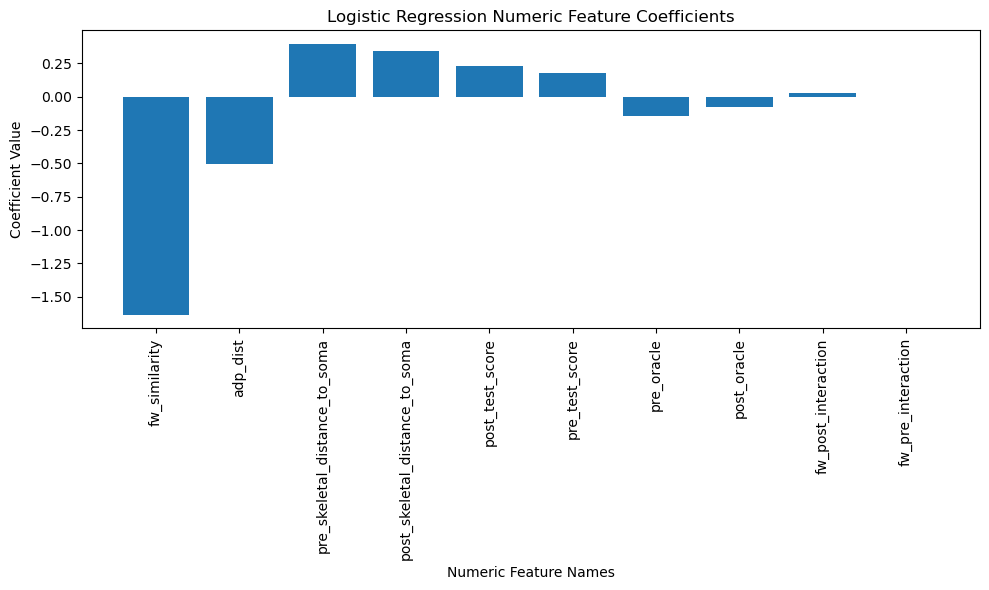

[-1.63594394e+00 -5.06750500e-01  3.95744936e-01  3.42833357e-01
  2.29976119e-01  1.76034476e-01 -1.41419647e-01 -7.77614319e-02
  3.12791158e-02  2.27175707e-04]


In [56]:
sorted_indices = np.argsort(-np.abs(numeric_feature_coefs))

sorted_numeric_features = np.array(numeric_cols)[sorted_indices]
sorted_numeric_coefs = numeric_feature_coefs[sorted_indices]

plt.figure(figsize=(10, 6), dpi=100)
plt.bar(sorted_numeric_features, sorted_numeric_coefs)
plt.title('Logistic Regression Numeric Feature Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Numeric Feature Names')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(sorted_numeric_coefs)

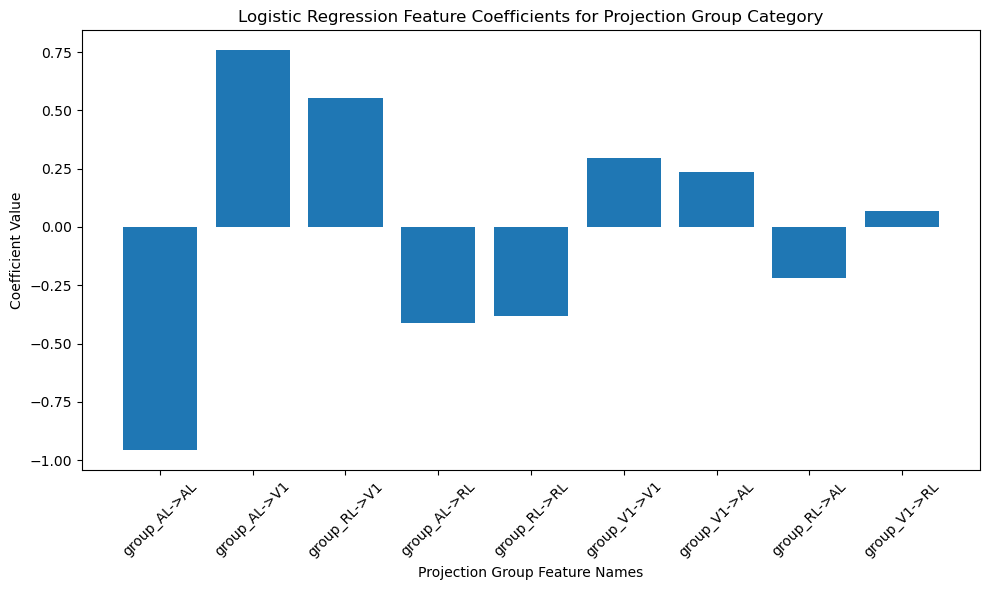

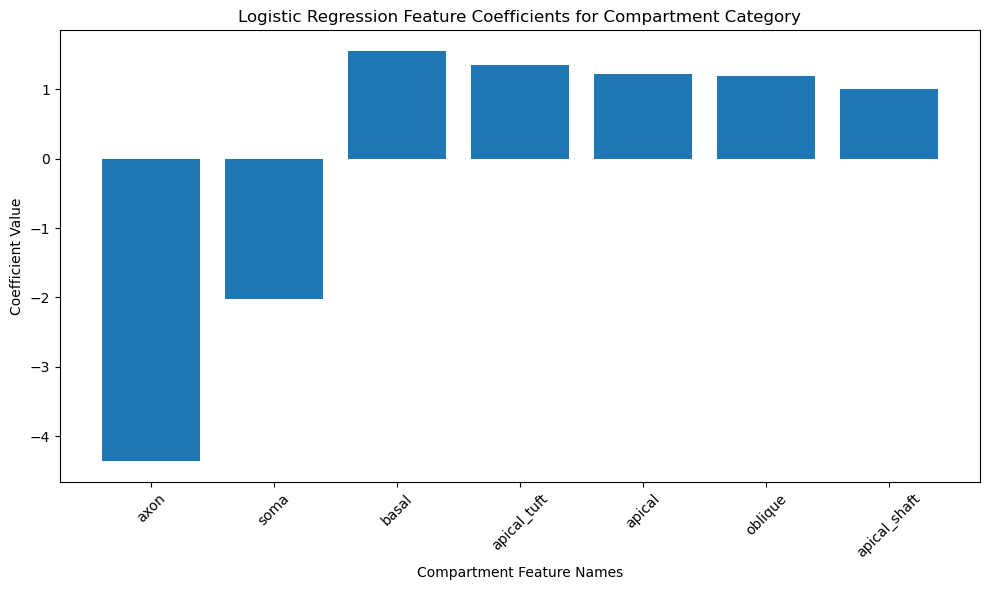

In [63]:
sorted_indices_pg = np.argsort(-np.abs(pg_coefs))
shorten_col = lambda x: x[x.index("_") + 1:]
shorten_col_np = np.vectorize(shorten_col)
sorted_pg_features = shorten_col_np(np.array(ohe_feature_names[:pg_count])[sorted_indices_pg])
sorted_pg_coefs = pg_coefs[sorted_indices_pg]

plt.figure(figsize=(10, 6), dpi=100)
plt.bar(sorted_pg_features, sorted_pg_coefs)
plt.title('Logistic Regression Feature Coefficients for Projection Group Category')
plt.ylabel('Coefficient Value')
plt.xlabel('Projection Group Feature Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sorted_indices_comp = np.argsort(-np.abs(comp_coefs))
sorted_comp_features = shorten_col_np(np.array(ohe_feature_names[pg_count:pg_count+comp_count])[sorted_indices_comp])
sorted_comp_coefs = comp_coefs[sorted_indices_comp]

plt.figure(figsize=(10, 6), dpi=100)
plt.bar(sorted_comp_features, sorted_comp_coefs)
plt.title('Logistic Regression Feature Coefficients for Compartment Category')
plt.ylabel('Coefficient Value')
plt.xlabel('Compartment Feature Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


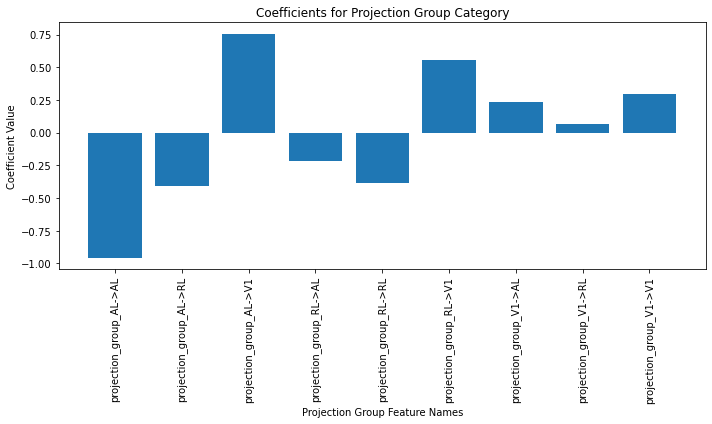

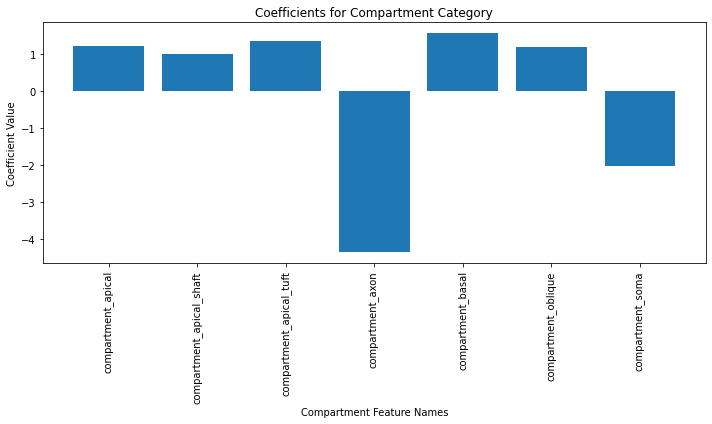

In [27]:
pg_coefs = cat_feature_coefs[:pg_count]
comp_coefs = cat_feature_coefs[pg_count:pg_count+comp_count]

# Plot for 'projection_group'
plt.figure(figsize=(10, 6))
plt.bar(ohe_feature_names[:pg_count], pg_coefs)
plt.title('Coefficients for Projection Group Category')
plt.ylabel('Coefficient Value')
plt.xlabel('Projection Group Feature Names')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot for 'compartment'
plt.figure(figsize=(10, 6))
plt.bar(ohe_feature_names[pg_count:pg_count+comp_count], comp_coefs)
plt.title('Coefficients for Compartment Category')
plt.ylabel('Coefficient Value')
plt.xlabel('Compartment Feature Names')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [25]:
lb_data.head()

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,pre_feature_weights,post_feature_weights,pre_morph_embeddings,post_morph_embeddings,fw_similarity,projection_group,fw_post_interaction,fw_pre_interaction,pred,connected
0,0,527499,544761,912282,529457,543459,916958,4783.37,239163.00,178032.0,...,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.03441501, 0.41964892, 0.23311342, 0.327173...","[0.5603107213973999, -0.3908874094486236, -0.1...","[1.132591724395752, -0.0064769592136144, -0.67...",-0.022573,AL->V1,-0.013506,-0.011364,False,False
1,1,1269890,471870,837816,1271230,469651,841045,4060.72,294573.00,1193910.0,...,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.03917461, -0.1830603, -0.3704222, 0.183293...","[0.5603107213973999, -0.3908874094486236, -0.1...","[1.0723994970321655, -0.7540942430496216, 0.11...",0.353360,AL->RL,0.182062,0.177902,False,False
2,2,666057,469875,925239,665387,467214,923430,2912.80,4102.75,387714.0,...,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.66653997, 0.5036552, 0.047438737, 0.181578...","[0.5603107213973999, -0.3908874094486236, -0.1...","[-0.0201839506626129, -0.2563340067863464, 0.1...",0.052183,AL->V1,0.032093,0.026272,False,False
3,3,696633,453516,925806,696648,453417,921875,3272.83,31123.00,424714.0,...,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.66653997, 0.5036552, 0.047438737, 0.181578...","[0.5603107213973999, -0.3908874094486236, -0.1...","[-0.0201839506626129, -0.2563340067863464, 0.1...",0.052183,AL->V1,0.032093,0.026272,False,False
4,4,567525,585921,888426,570714,583676,891264,4441.75,114201.00,250411.0,...,"[0.19683373, 0.19128098, 0.49339047, -0.029781...","[-0.40308818, 0.20905656, 0.25083357, -0.19731...","[0.5603107213973999, -0.3908874094486236, -0.1...","[-0.0254557952284812, 0.7573301792144775, -0.2...",0.009847,AL->V1,0.005979,0.004957,False,False


In [26]:
#columns should be ID, connected
submission_data = lb_data.filter(['ID','connected'])

In [27]:
submission_data

,ID,connected
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
42588,42588,True
42589,42589,False
42590,42590,False
42591,42591,False


In [28]:
submission_data.to_csv("./submission_5.csv", index=False)